In [31]:
import pandas as pd
import os
import glob
import os 
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import hermione as hm



# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')


data_ingest_folder = os.path.join('..', '00_data_ingest' )
folder = os.path.join(data_ingest_folder, '13_ngenes_ncells_facs')

palette_folder = os.path.join(data_ingest_folder, '15_color_palette')
colors = pd.read_csv(os.path.join(palette_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta                  #1f77b4
Bladder                #aec7e8
Brain_Microglia        #ff7f0e
Brain_Non-microglia    #ffbb78
Colon                  #2ca02c
Diaphragm              #98df8a
Fat                    #d62728
Heart                  #ff9896
Kidney                 #9467bd
Liver                  #c5b0d5
Lung                   #8c564b
Mammary                #c49c94
Marrow                 #e377c2
Muscle                 #f7b6d2
Pancreas               #7f7f7f
Skin                   #c7c7c7
Spleen                 #bcbd22
Thymus                 #dbdb8d
Tongue                 #17becf
Trachea                #9edae5
Name: color, dtype: object

In [32]:

globber = os.path.join(folder, '*_nreads_ngenes.csv')

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(46426, 4)
21


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [33]:
nreads_ngenes

,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta
L9.MAA000594.3_8_M.1.1,798,196845,Heart,Aorta
P17.MAA000594.3_8_M.1.1,3531,818237,Heart,Aorta
D6.MAA000594.3_8_M.1.1,584,246067,Heart,Aorta
F14.MAA000594.3_8_M.1.1,1085,50291,Heart,Aorta
H17.MAA000594.3_8_M.1.1,1088,64911,Heart,Aorta


In [34]:
import numpy as np

In [35]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])

In [36]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')
cell_annotations['tissue'] = cell_annotations['tissue'].str.replace('_', ' ')

In [37]:
colors.index

Index(['Aorta', 'Bladder', 'Brain Microglia', 'Brain Non-microglia', 'Colon',
       'Diaphragm', 'Fat', 'Heart', 'Kidney', 'Liver', 'Lung', 'Mammary',
       'Marrow', 'Muscle', 'Pancreas', 'Skin', 'Spleen', 'Thymus', 'Tongue',
       'Trachea'],
      dtype='object')

In [38]:
tissues = sorted(nreads_ngenes['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain',
 'Brain Microglia',
 'Brain Non-microglia',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [39]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

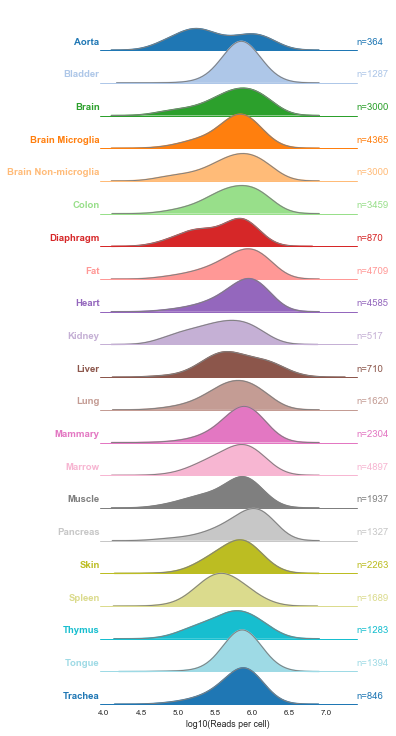

In [40]:
g = hm.horizonplot(x='log10 nReads', **kwargs)
g.set_xlabels('log10(Reads per cell)')

for ax in g.axes.flatten():
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)


g.savefig('figure1d_horizonplot_log10_reads_per_cell.pdf')